### Multi-Layer Perceptron (MLP) with Keras

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers.legacy import Adam

### Data Preprocessing

Importing the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ikiearth/PVT-DATA/main/Chapter6_PVT%20Data.csv')
df

,Temperature,Rs,Gas Gravity,Oil API,Pbp
0,124.224811,983.507201,1.095773,27.378218,3094.473796
1,105.670201,1118.311927,1.264539,30.497141,2593.138497
2,220.984279,255.071907,0.840619,37.779038,1118.302194
3,244.728321,48.801731,1.109872,35.049613,232.011706
4,104.153879,75.385002,0.889540,24.543380,421.236666
...,...,...,...,...,...
244,104.019931,273.074402,0.830617,31.615851,1136.336659
245,153.868480,145.006939,0.855444,27.539107,783.000819
246,134.831647,91.510982,0.988292,31.875268,397.326261
247,199.504544,238.578634,0.963525,34.880735,940.892103


Create feature matrix and target matrix

In [3]:
X = df.drop(['Pbp'], axis=1)
y = df['Pbp']

Split the dataset into training and test set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building ANN via `Sequential` model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError

Define the `input_shape` for the first hidden layer

In [7]:
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([Dense(units=20, input_shape=(4,), activation='relu'),
                    Dense(units=20, activation='relu'),
                    Dense(units=1)])

Summarize model architecture

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Prepare the model before training using `compile` method. [Click here](https://keras.io/api/models/model_training_apis/) for more info.

In [10]:
from tensorflow.keras.optimizers import Adam

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='MeanSquaredError',
              metrics=['RootMeanSquaredError'])

Train the model. [Click here](https://keras.io/api/models/model_training_apis/) for more info.

In [12]:
history = model.fit(X_train_scaled, y_train, batch_size = 32, epochs = 1000, shuffle=True)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 2782371.7500 - root_mean_squared_error: 1668.0443
Epoch 2/1000
7/7 [==============================] - 0s 5ms/step - loss: 2781984.7500 - root_mean_squared_error: 1667.9282
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 2781563.2500 - root_mean_squared_error: 1667.8019
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 2781135.0000 - root_mean_squared_error: 1667.6736
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 2780682.5000 - root_mean_squared_error: 1667.5378
Epoch 6/1000
7/7 [==============================] - 0s 6ms/step - loss: 2780218.5000 - root_mean_squared_error: 1667.3987
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 2779688.5000 - root_mean_squared_error: 1667.2397
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 2779144.0000 - root_mean_squared_error: 1667.0765
Epoch 9/1000
7/7 [======

In [13]:
history.history

{'loss': [2782371.75,
  2781984.75,
  2781563.25,
  2781135.0,
  2780682.5,
  2780218.5,
  2779688.5,
  2779144.0,
  2778513.0,
  2777806.75,
  2776996.25,
  2776045.75,
  2775081.5,
  2773870.75,
  2772589.75,
  2771189.75,
  2769556.25,
  2767783.25,
  2765829.5,
  2763460.75,
  2761074.25,
  2758291.5,
  2755331.75,
  2752154.0,
  2748448.25,
  2744599.5,
  2740269.75,
  2735629.5,
  2730528.5,
  2725284.75,
  2719405.75,
  2713373.25,
  2706774.5,
  2699577.5,
  2692263.75,
  2684150.75,
  2675543.75,
  2665965.5,
  2656360.25,
  2645494.75,
  2634919.25,
  2622951.0,
  2611420.0,
  2598414.25,
  2585059.5,
  2571247.25,
  2556211.25,
  2541007.5,
  2525133.25,
  2508815.0,
  2492089.5,
  2474833.75,
  2456172.75,
  2436634.25,
  2416922.75,
  2395791.5,
  2375537.75,
  2352949.5,
  2329992.75,
  2306169.5,
  2281146.75,
  2256412.25,
  2230176.25,
  2204353.25,
  2178914.0,
  2152779.0,
  2125550.25,
  2097218.5,
  2069122.625,
  2040932.375,
  2010736.875,
  1980714.875,
  194971

In [14]:
type(history.history)

dict

In [15]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

Text(0, 0.5, 'loss')

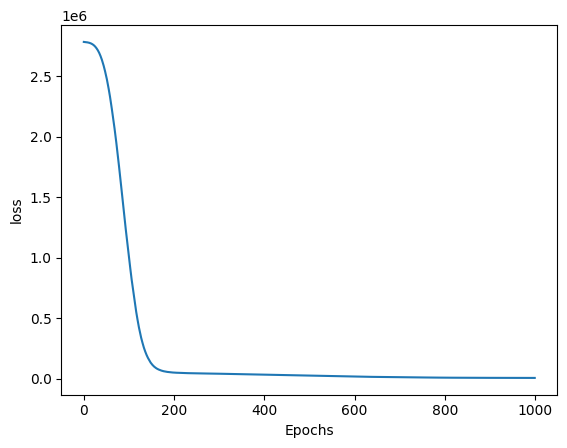

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'RMSE')

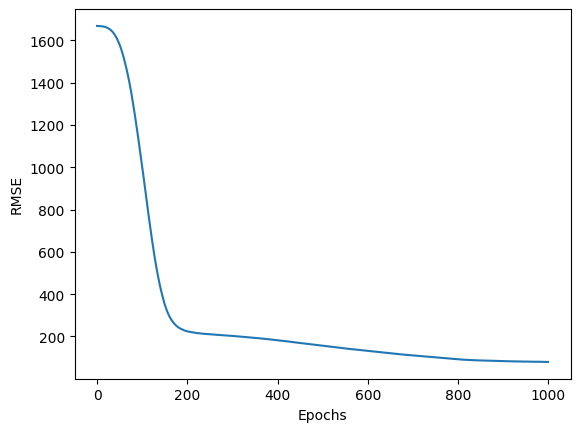

In [17]:
plt.plot(history.history['root_mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')

### Building ANN with validation split

In [18]:
model = Sequential([Dense(units=20, input_shape=(4,), activation='relu'),
                    Dense(units=60, activation='relu'),
                    Dense(units=1)])

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='MeanSquaredError',
              metrics=['RootMeanSquaredError'])

In [20]:
history = model.fit(X_train_scaled, y_train, 
                    validation_split = 0.2,
                    batch_size = 8, epochs = 1000, shuffle=True)

Epoch 1/1000
20/20 [==============================] - 0s 10ms/step - loss: 2528917.2500 - root_mean_squared_error: 1590.2570 - val_loss: 3788761.5000 - val_root_mean_squared_error: 1946.4741
Epoch 2/1000
20/20 [==============================] - 0s 3ms/step - loss: 2526982.5000 - root_mean_squared_error: 1589.6486 - val_loss: 3785738.0000 - val_root_mean_squared_error: 1945.6973
Epoch 3/1000
20/20 [==============================] - 0s 1ms/step - loss: 2524474.0000 - root_mean_squared_error: 1588.8594 - val_loss: 3781488.5000 - val_root_mean_squared_error: 1944.6050
Epoch 4/1000
20/20 [==============================] - 0s 1ms/step - loss: 2520527.0000 - root_mean_squared_error: 1587.6168 - val_loss: 3775263.2500 - val_root_mean_squared_error: 1943.0037
Epoch 5/1000
20/20 [==============================] - 0s 1ms/step - loss: 2514772.0000 - root_mean_squared_error: 1585.8032 - val_loss: 3765627.2500 - val_root_mean_squared_error: 1940.5225
Epoch 6/1000
20/20 [=============================

Text(0.5, 0, 'Epochs')

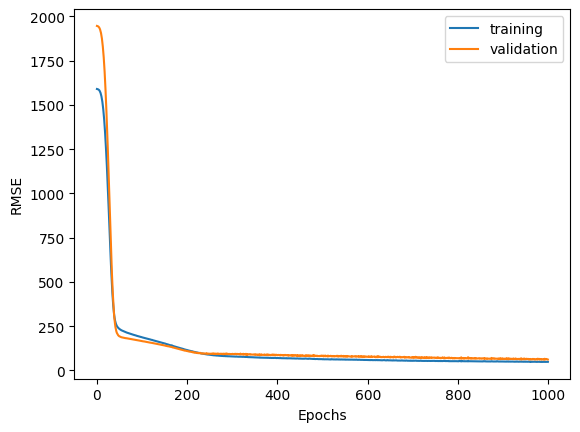

In [21]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.legend(['training', 'validation'])
plt.ylabel('RMSE')
plt.xlabel('Epochs')

In [22]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(4, 20) dtype=float32, numpy=
 array([[ 4.4112992e-01, -2.3195332e-01, -2.7584305e-02,  2.2316857e-01,
         -1.5074377e-01,  3.8040656e-01, -1.4382999e-01,  3.8691771e-01,
          1.0931175e+00,  1.6320246e-01,  8.6576164e-01, -3.6647969e-03,
         -2.4373209e-01,  5.9314096e-01, -2.4720711e-01,  3.5178781e-02,
          4.1917267e-01, -2.8437478e-02,  7.7715427e-01,  8.7365401e-01],
        [-6.1655290e-02,  9.2065918e-01,  1.2995081e+00,  7.1131311e-02,
          1.4744791e+00,  4.0214679e-01,  5.4833812e-01,  1.1374979e+00,
          7.2535592e-01,  1.3648919e+00,  6.3243788e-01,  1.4632049e+00,
         -1.3106355e-01,  1.5316571e+00, -1.1770288e-02,  1.4216859e+00,
          1.7865844e+00,  1.8168351e-01, -2.2945480e-01,  9.0761805e-01],
        [-2.4898037e-01,  1.3727519e-01, -1.5942173e-01,  4.0117621e-01,
         -1.6953897e-01,  5.0036673e-02, -5.0531721e-01, -9.3074614e-01,
          1.7576259e-01, -7.2980128e-02,  1.4887177e-

### Predict

In [23]:
y_pred = model.predict(X_test_scaled)

2/2 [==============================] - 0s 3ms/step


In [24]:
y_pred

array([[1311.1816 ],
       [1948.4326 ],
       [1819.9827 ],
       [1308.8198 ],
       [2482.9412 ],
       [ 902.00055],
       [1320.0645 ],
       [ 396.24796],
       [3154.9841 ],
       [2076.8674 ],
       [2725.3196 ],
       [1482.0679 ],
       [2412.606  ],
       [1074.1228 ],
       [1119.9775 ],
       [ 641.8852 ],
       [3704.2698 ],
       [1782.6934 ],
       [ 474.82562],
       [2456.2393 ],
       [2347.3982 ],
       [1751.1882 ],
       [ 742.1306 ],
       [1482.5065 ],
       [ 888.34344],
       [1367.5935 ],
       [ 437.6788 ],
       [1376.1685 ],
       [ 161.67484],
       [ 540.33856],
       [1373.612  ],
       [ 318.66647],
       [ 526.7077 ],
       [2953.1714 ],
       [1843.7595 ],
       [ 806.4302 ],
       [2739.345  ],
       [ 658.6034 ],
       [2821.6145 ],
       [ 809.4718 ],
       [1094.395  ],
       [1659.4067 ],
       [2072.0657 ],
       [ 848.2281 ],
       [ 624.5183 ],
       [3626.2974 ],
       [ 632.05164],
       [ 766.

In [25]:
evaluation = model.evaluate(X_train_scaled, y_train)

7/7 [==============================] - 0s 770us/step - loss: 2601.7048 - root_mean_squared_error: 51.0069


In [26]:
evaluation

[2601.704833984375, 51.00690841674805]

In [27]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9922944631591601

### [Alternatives] Building ANN Model via `add()` model

Initializing the ANN

In [ ]:
model = Sequential()

Adding the input layer and the first hidden layer

In [ ]:
model.add(Dense(units=2, activation='relu'))

Adding the second hidden layer

In [ ]:
model.add(Dense(units=6, activation='relu'))

Adding the output layer

In [ ]:
model.add(Dense(units=1))

Compile layers

In [ ]:
model.compile(optimizer='adam', loss='MeanSquaredError', metrics='RootMeanSquaredError')

Model training

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
7/7 [==============================] - 3s 9ms/step - loss: 2538511.5000 - root_mean_squared_error: 1593.2708
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 2520756.0000 - root_mean_squared_error: 1587.6888
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 2501581.7500 - root_mean_squared_error: 1581.6389
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 2482315.2500 - root_mean_squared_error: 1575.5365
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 2461921.2500 - root_mean_squared_error: 1569.0510
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 2440139.5000 - root_mean_squared_error: 1562.0946
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 2417116.2500 - root_mean_squared_error: 1554.7078
Epoch 8/100
7/7 [==============================] - 0s 18ms/step - loss: 2393302.7500 - root_mean_squared_error: 1547.0303
Epoch 9/100
7/7 [==========

Model summary

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
 dense_18 (Dense)            (None, 6)                 18        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Model's internal parameter (weights and biases)

In [ ]:
model.weights

[<tf.Variable 'dense_17/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.9373159 , -0.46909073],
        [-0.04556823,  0.94429904],
        [ 0.84527797,  1.0440966 ],
        [ 0.40489432,  1.2634563 ]], dtype=float32)>,
 <tf.Variable 'dense_17/bias:0' shape=(2,) dtype=float32, numpy=array([0.30848548, 0.50122267], dtype=float32)>,
 <tf.Variable 'dense_18/kernel:0' shape=(2, 6) dtype=float32, numpy=
 array([[ 0.83263123,  0.43678308, -0.5727104 ,  1.1764522 ,  0.58032686,
          0.40705904],
        [ 0.7422767 ,  1.1680766 , -0.5778979 ,  0.79810363,  0.81458604,
         -0.49758273]], dtype=float32)>,
 <tf.Variable 'dense_18/bias:0' shape=(6,) dtype=float32, numpy=
 array([ 0.6038518 ,  0.4083241 ,  0.        ,  0.5867368 ,  0.42262724,
        -0.15463802], dtype=float32)>,
 <tf.Variable 'dense_19/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[ 0.564413  ],
        [ 1.1885374 ],
        [ 0.27832317],
        [ 0.5370705 ],
        [ 1.040393  ],
        [-0.24

Text(0, 0.5, 'loss')

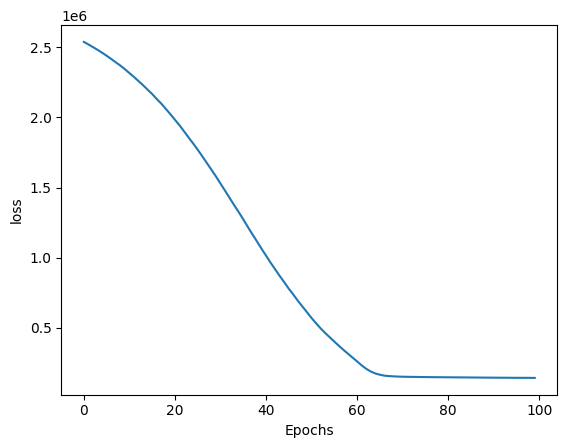

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')